# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ta`u
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | progreso
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | gadzhiyevo
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | labrador city
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | ar ruways
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | adzope
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | fernie
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | matthew town
Processing Record 19 of Set 1 | tobelo
Processing Record 20 of Set 1 | sao felix do xingu
Processing Record 21 of Set 1 | port dougl

Processing Record 39 of Set 4 | alupka
Processing Record 40 of Set 4 | broken hill
Processing Record 41 of Set 4 | darwin
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | emerald
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | whitehorse
Processing Record 46 of Set 4 | nagqu
Processing Record 47 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 48 of Set 4 | ebaye
Processing Record 49 of Set 4 | east london
Processing Record 0 of Set 5 | neelankarai
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | punta arenas
Processing Record 3 of Set 5 | valley east
City not found. Skipping...
Processing Record 4 of Set 5 | saipan
Processing Record 5 of Set 5 | shahpura
Processing Record 6 of Set 5 | namsos
Processing Record 7 of Set 5 | afaahiti
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | minas de marcona
Processing Record 10 of Set 5 | zhelezinka
Processing Record 11 of Set 5 | castillos
Pr

Processing Record 28 of Set 8 | yuzhno-kurilsk
Processing Record 29 of Set 8 | kondoa
Processing Record 30 of Set 8 | kroya
Processing Record 31 of Set 8 | mirandela
Processing Record 32 of Set 8 | dadukou
Processing Record 33 of Set 8 | punta del este
Processing Record 34 of Set 8 | la reforma
Processing Record 35 of Set 8 | san clemente del tuyu
Processing Record 36 of Set 8 | kalat
Processing Record 37 of Set 8 | dzhambeyty
Processing Record 38 of Set 8 | xinguara
City not found. Skipping...
Processing Record 39 of Set 8 | bikenibeu village
Processing Record 40 of Set 8 | tvoroyri
Processing Record 41 of Set 8 | sukumo
Processing Record 42 of Set 8 | taro
Processing Record 43 of Set 8 | palikir - national government center
Processing Record 44 of Set 8 | khenifra
Processing Record 45 of Set 8 | selkirk
Processing Record 46 of Set 8 | kenai
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | buritis
Processing Record 49 of Set 8 | san francisco de la paz
Processing

Processing Record 15 of Set 12 | vengurla
Processing Record 16 of Set 12 | sol'-iletsk
Processing Record 17 of Set 12 | illizi
Processing Record 18 of Set 12 | manuguru
Processing Record 19 of Set 12 | reggane
Processing Record 20 of Set 12 | chornomors'k
Processing Record 21 of Set 12 | kosciuszko national park
City not found. Skipping...
Processing Record 22 of Set 12 | poronaysk
Processing Record 23 of Set 12 | qarazhal
Processing Record 24 of Set 12 | biltine
Processing Record 25 of Set 12 | parras de la fuente
Processing Record 26 of Set 12 | moriki
Processing Record 27 of Set 12 | port hedland
Processing Record 28 of Set 12 | livingstone
Processing Record 29 of Set 12 | ciudad lazaro cardenas
Processing Record 30 of Set 12 | belyy yar
Processing Record 31 of Set 12 | kabalo
Processing Record 32 of Set 12 | nayoro
Processing Record 33 of Set 12 | salinopolis
Processing Record 34 of Set 12 | korla
Processing Record 35 of Set 12 | corinto
Processing Record 36 of Set 12 | ixtapa
Proc

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ta`u,-14.2336,-169.5144,29.20,79,100,8.38,AS,1712092181
1,port-aux-francais,-49.3500,70.2167,7.14,77,82,13.11,TF,1712092181
2,progreso,21.2833,-89.6667,40.06,43,45,3.77,MX,1712092181
3,yellowknife,62.4560,-114.3525,0.79,73,77,4.47,CA,1712092181
4,olonkinbyen,70.9221,-8.7187,-4.26,63,71,5.65,SJ,1712092182


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,29.20,79,100,8.38,AS,1712092181
1,port-aux-francais,-49.3500,70.2167,7.14,77,82,13.11,TF,1712092181
2,progreso,21.2833,-89.6667,40.06,43,45,3.77,MX,1712092181
3,yellowknife,62.4560,-114.3525,0.79,73,77,4.47,CA,1712092181
4,olonkinbyen,70.9221,-8.7187,-4.26,63,71,5.65,SJ,1712092182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

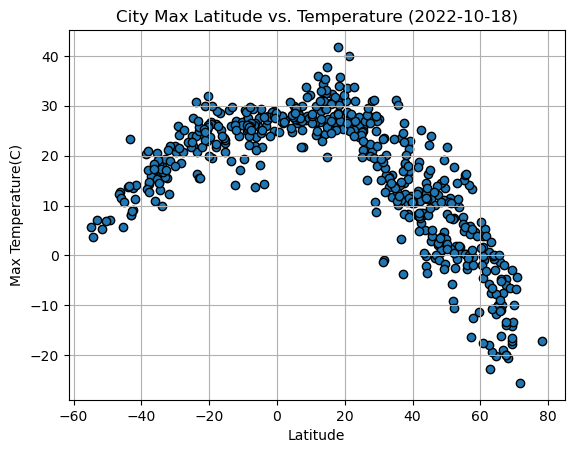

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

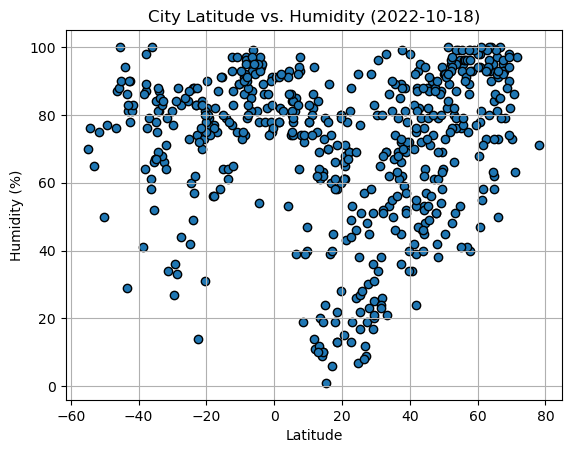

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

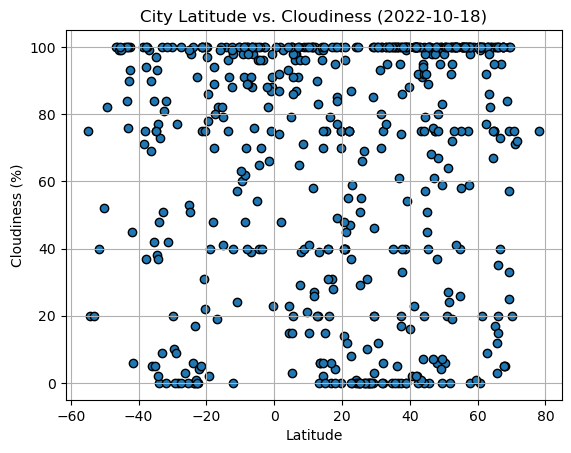

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

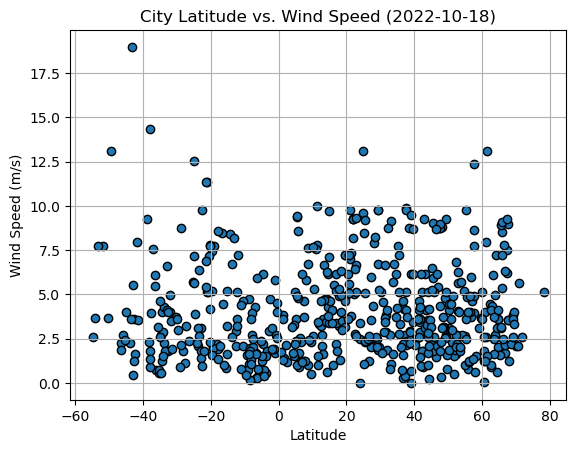

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis, eq_loc):
    correlation = st.pearsonr(x_axis, y_axis)
    p_slope,p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope*x_axis+p_int
    eq=f"y={p_slope: .2f}x + {p_int: .2f}"
    
    plt.scatter(x_axis, y_axis, marker="o")
    plt.plot(x_axis, p_fit, "--", color="red")
    plt.annotate(eq, eq_loc, fontsize=12, color="red")
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0], 2)}")

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,progreso,21.2833,-89.6667,40.06,43,45,3.77,MX,1712092181
3,yellowknife,62.4560,-114.3525,0.79,73,77,4.47,CA,1712092181
4,olonkinbyen,70.9221,-8.7187,-4.26,63,71,5.65,SJ,1712092182
6,gadzhiyevo,69.2551,33.3362,-17.73,98,33,3.84,RU,1712092182
7,kapa'a,22.0752,-159.3190,27.99,69,75,9.26,US,1712092183


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ta`u,-14.2336,-169.5144,29.20,79,100,8.38,AS,1712092181
1,port-aux-francais,-49.3500,70.2167,7.14,77,82,13.11,TF,1712092181
5,bredasdorp,-34.5322,20.0403,16.40,84,38,1.26,ZA,1712092182
9,port elizabeth,-33.9180,25.5701,17.95,81,48,2.24,ZA,1712092183
11,puerto natales,-51.7236,-72.4875,5.25,75,40,7.72,CL,1712092170


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.88


Text(0, 0.5, 'Max Temp')

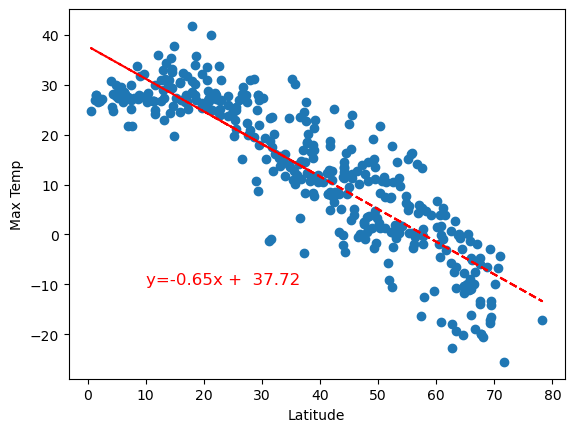

In [28]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10, -10))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value between Lat and Max Temp is 0.78


Text(0, 0.5, 'Max Temp')

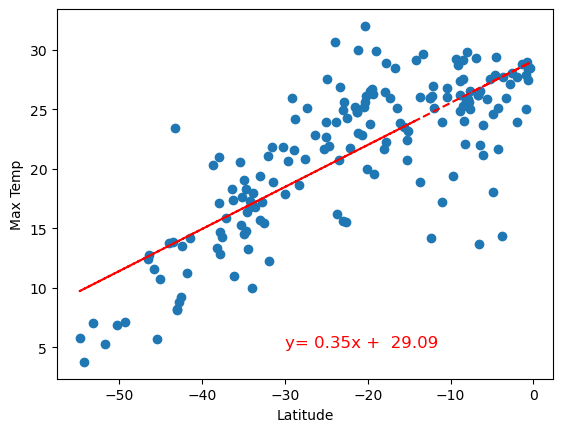

In [29]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30, 5))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** The northern hemisphere and the southern hemisphere have very different correlations between the latitude and the temperature ("Max Temp"). The latitude and the temperature have a negative correlation in the northern hemisphere (-0.88), but there is a positive correlation in the southern hemisphere (0.78). 

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.36


Text(0, 0.5, 'Humidity')

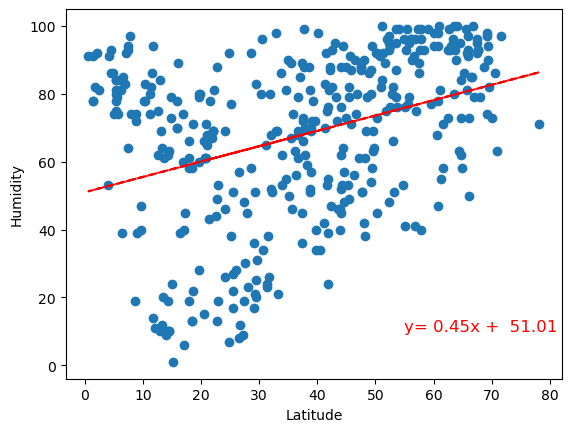

In [30]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (55, 10))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value between Lat and Humidity is 0.25


Text(0, 0.5, 'Humidity')

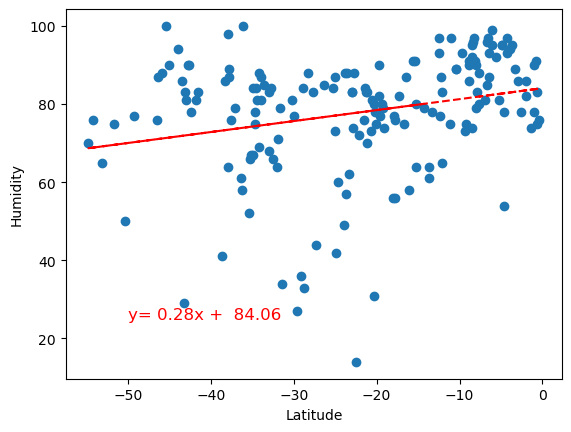

In [31]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-50, 25))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** The correlation between the latitude and humidity are positive yet weak in the northen (0.36) and southern hemisphere (0.25). In both hemispheres, there will be an increase in humidity when latitude increases, but it will not be significant.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.14


Text(0, 0.5, 'Cloudiness')

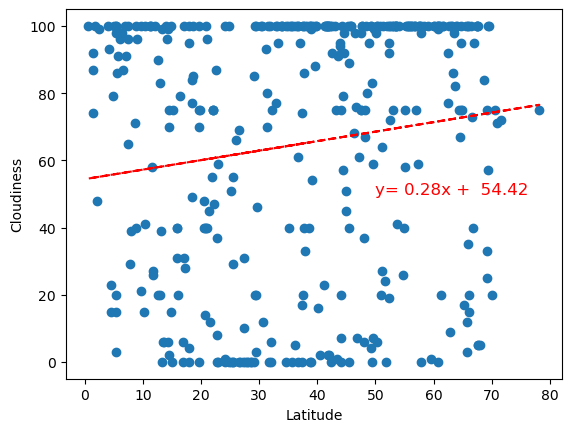

In [32]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (50, 50))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value between Lat and Humidity is 0.25


Text(0, 0.5, 'Cloudiness')

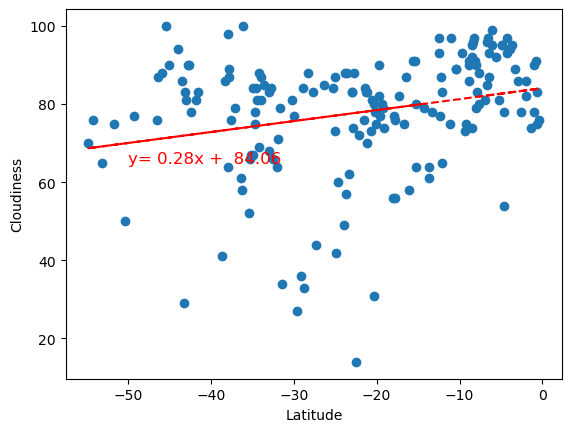

In [33]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-50, 65))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** The correlations between latitude and cloudiness were both positive in the northern and southern hemisphere. However, they were very minimal (northern: 0.14; southern: 0.25). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is -0.04


Text(0, 0.5, 'Wind Speed')

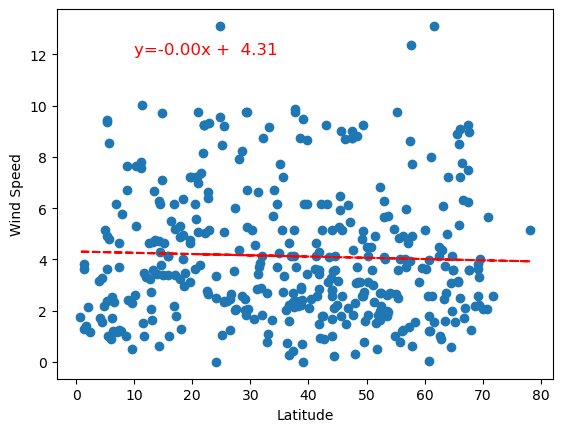

In [34]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10, 12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value between Lat and Wind Speed is -0.22


Text(0, 0.5, 'Wind Speed')

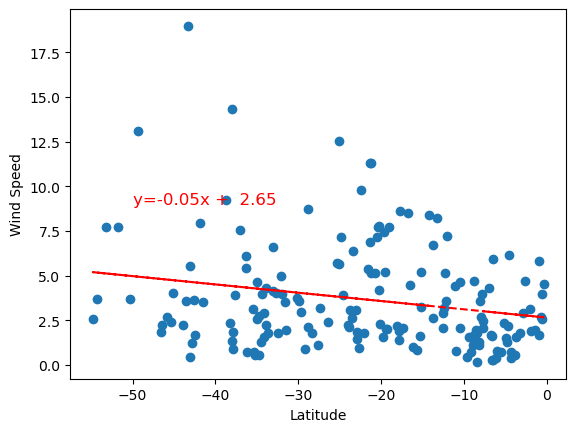

In [35]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50, 9))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** There seems to be very low negative correlations between latitude and wind speed for both the northern (-0.04) and southern hemispere (-0.22). 